In [2]:
import numpy as np
import pandas as pd 
from sklearn.datasets import load_iris


In [3]:

iris=load_iris()
X=pd.DataFrame(iris.data)
y=pd.Series(iris.target)


In [4]:
df=pd.concat([X,y],axis=1)


In [5]:
# Example for iris dataset
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


In [6]:
# df=df.rename(columns={df.columns[-1]: "species"})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
new_df=df[['sepal_length','sepal_width','species']]

new_df=new_df[df['species']!=0]
new_df.shape

(100, 3)

In [8]:
df=new_df

In [9]:
df=df.sample(100) #shuffle
df_train=df.iloc[:60,:].sample(10)  # out of first 60  selecting 10 at random
df_val=df.iloc[60:80,:].sample(5)
df_test=df.iloc[80:,:].sample(5) # final testing

In [10]:
df_train

,sepal_length,sepal_width,species
116,6.5,3.0,2
85,6.0,3.4,1
146,6.3,2.5,2
110,6.5,3.2,2
88,5.6,3.0,1
94,5.6,2.7,1
132,6.4,2.8,2
72,6.3,2.5,1
75,6.6,3.0,1
62,6.0,2.2,1


In [11]:
df_val

,sepal_length,sepal_width,species
80,5.5,2.4,1
60,5.0,2.0,1
71,6.1,2.8,1
106,4.9,2.5,2
68,6.2,2.2,1


In [12]:
df_test

,sepal_length,sepal_width,species
140,6.7,3.1,2
99,5.7,2.8,1
56,6.3,3.3,1
63,6.1,2.9,1
114,5.8,2.8,2


In [29]:
X_test=df_val.iloc[:,:2].values
y_test=df_val.iloc[:,-1].values

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [31]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()  
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

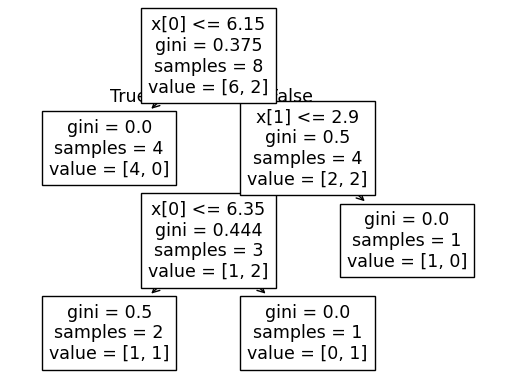

0.8


c:\Users\far\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\far\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


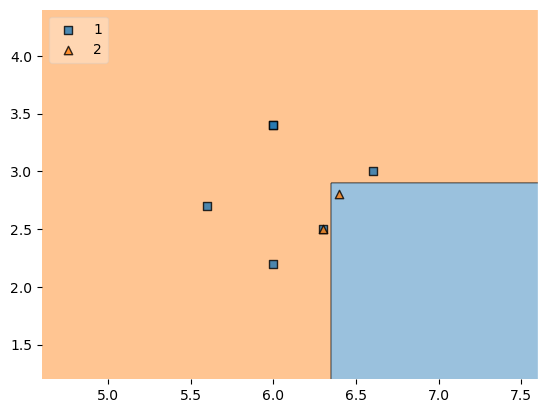

In [32]:
# decision tree 1
df_bag=df_train.sample(8,replace=True)
X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]
dt1=DecisionTreeClassifier()
evaluate(dt1,X,y)


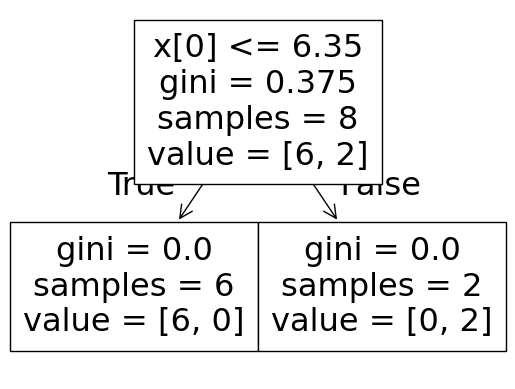

c:\Users\far\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


c:\Users\far\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


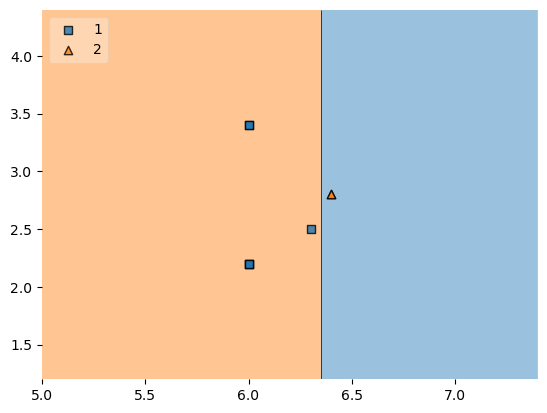

In [33]:
# decision tree 2
df_bag=df_train.sample(8,replace=True)
X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]
dt2=DecisionTreeClassifier()
evaluate(dt2,X,y)



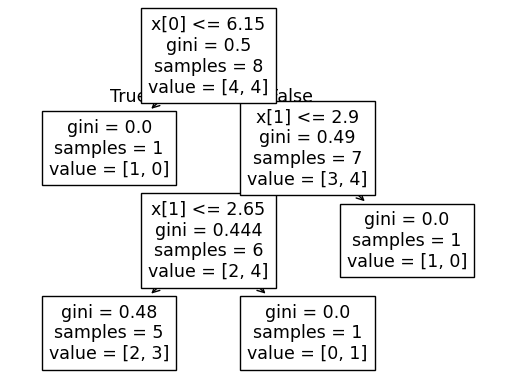

c:\Users\far\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


c:\Users\far\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


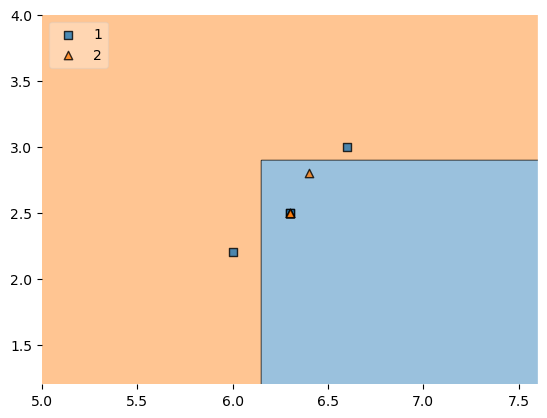

In [34]:
# decision tree 3
df_bag=df_train.sample(8,replace=True)
X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]
dt3=DecisionTreeClassifier()
evaluate(dt3,X,y)


In [41]:
# prediction 
df_test

,sepal_length,sepal_width,species
140,6.7,3.1,2
99,5.7,2.8,1
56,6.3,3.3,1
63,6.1,2.9,1
114,5.8,2.8,2


In [42]:
for i in range(df_test.shape[0]):
    arr=df_test.iloc[[i],0:2]
    print(np.array(arr).reshape(1,2))
    print("Predictor 1",dt1.predict(np.array(arr).reshape(1,2)))
    print("Predictor 2",dt2.predict(np.array(arr).reshape(1,2)))
    print("Predictor 3",dt3.predict(np.array(arr).reshape(1,2)))

[[6.7 3.1]]
Predictor 1 [1]
Predictor 2 [2]
Predictor 3 [1]
[[5.7 2.8]]
Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]
[[6.3 3.3]]
Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]
[[6.1 2.9]]
Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]
[[5.8 2.8]]
Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]


c:\Users\far\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\far\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\far\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\far\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\far\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Us